In [38]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)


In [50]:
df = []
for date in os.listdir("data"):
    for name in os.listdir(f"data/{date}"):
        for filename in os.listdir(f"data/{date}/{name}"):
            data = pd.read_csv(f"data/{date}/{name}/{filename}")
            data['name'] = [name] * data.shape[0]
            data['date'] = [date] * data.shape[0]
            df.append(data)
df = pd.concat(df)
df = df.drop(["Unnamed: 0"], axis=1)
df

,product_id,quantity,name,date
0,47,1,Alexey_Smirnov,2020-12-03
1,57,1,Alexey_Smirnov,2020-12-03
2,14,2,Alexey_Smirnov,2020-12-03
3,52,1,Alexey_Smirnov,2020-12-03
4,1,4,Alexey_Smirnov,2020-12-03
...,...,...,...,...
1,66,4,Rostislav_Petrov,2020-12-09
2,39,2,Rostislav_Petrov,2020-12-09
0,82,4,Vasiliy_Ivanov,2020-12-09
1,74,2,Vasiliy_Ivanov,2020-12-09


Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [29]:
df.groupby(["name"], as_index=False).\
    agg({"quantity":"sum"}).\
    rename(columns={"product_id":"total_quantity"}).\
    sort_values("quantity", ascending=False).\
    max()["name"]

'Vasiliy_Petrov'

Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [34]:
top_10 = df.groupby(["product_id"], as_index=False).\
    agg({"quantity":"sum"}).\
    sort_values("quantity", ascending=False)[:10]

In [44]:
top_10.query("product_id==56")["quantity"][42]

18

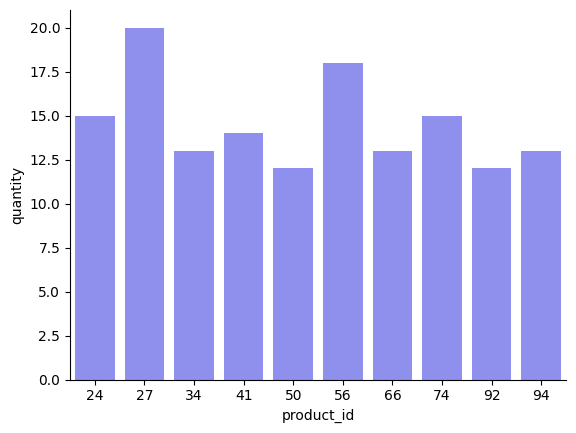

In [40]:
ax = sns.barplot(x="product_id", y="quantity", data=top_10, color='blue', alpha=0.5)
ax.set(xlabel='product_id', ylabel='quantity')
sns.despine()
plt.show()

Визуализируйте продажи по дням.

In [45]:
# df["date"] = pd.to_datetime(df["date"])

In [56]:
sales_by_days = df.groupby(["date"], as_index=False).\
    agg({"quantity":"sum"}).\
    sort_values("quantity", ascending=False)

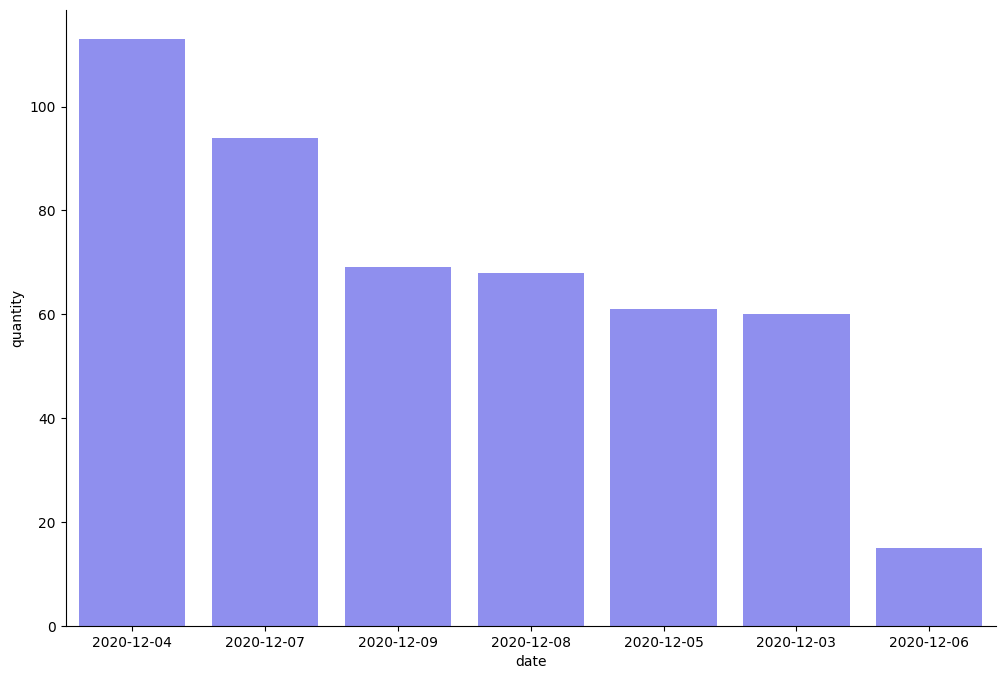

In [57]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x="date", y="quantity", data=sales_by_days, color='blue', alpha=0.5)
ax.set(xlabel='date', ylabel='quantity')
sns.despine()
plt.show()

Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [65]:
df.groupby(["name","product_id"]).\
    agg({"date": pd.Series.nunique}).\
    query("date > 1")

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
